In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
data_path = '/content/drive/My Drive/Hackaton/train_data.xlsx'

In [ ]:
import pandas as pd

data = pd.read_excel(data_path)


In [ ]:
data.head()

,brand,che_pc_usd,che_perc_gdp,cluster_nl,corporation,country,launch_date,date,drug_id,ind_launch_date,indication,insurance_perc_che,population,prev_perc,price_month,price_unit,public_perc_che,therapeutic_area,target
0,BRAND_354E,1.209114,1.665879,BRAND_354E_COUNTRY_88A3,CORP_D524,COUNTRY_88A3,2014-06-01,2014-06-01,DRUG_ID_8795,-1,['IND_C3B6'],1.893333,1.008039,0.028367,1.006444,1.013784,1.835821,THER_AREA_980E,1.000784
1,BRAND_626D,-1.000000,-1.000000,BRAND_626D_COUNTRY_8B47,CORP_01C7,COUNTRY_8B47,2014-06-01,2014-06-01,DRUG_ID_E66E,2014-09-01 00:00:00,"['IND_1590', 'IND_ECAC']",-1.000000,1.023562,0.000047,-1.000000,1.626677,-1.000000,THER_AREA_96D7,1.000000
2,BRAND_45D9,1.209114,1.665879,BRAND_45D9_COUNTRY_88A3,CORP_39F7,COUNTRY_88A3,2014-06-01,2014-06-01,DRUG_ID_F272,-1,['IND_B2EF'],1.893333,1.008039,0.001502,-1.000000,3.144874,1.835821,THER_AREA_96D7,1.002258
3,BRAND_D724,1.851280,2.051770,BRAND_D724_COUNTRY_445D,CORP_711A,COUNTRY_445D,2014-06-01,2014-06-01,DRUG_ID_1D4E,-1,['IND_BAFB'],1.000000,1.253186,0.001304,-1.000000,1.213446,1.805970,THER_AREA_6CEE,1.068761
4,BRAND_4887,1.791199,2.059130,BRAND_4887_COUNTRY_D8B0,CORP_443D,COUNTRY_D8B0,2014-06-01,2014-06-01,DRUG_ID_AA88,-1,['IND_3F31'],2.013333,1.639352,0.054467,1.018589,1.008708,1.880597,THER_AREA_6CEE,1.036312


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 118917 entries, 0 to 118916
Data columns (total 19 columns):
 #   Column              Non-Null Count   Dtype         
---  ------              --------------   -----         
 0   brand               118917 non-null  object        
 1   che_pc_usd          118917 non-null  float64       
 2   che_perc_gdp        118917 non-null  float64       
 3   cluster_nl          118917 non-null  object        
 4   corporation         118917 non-null  object        
 5   country             118917 non-null  object        
 6   launch_date         118917 non-null  datetime64[ns]
 7   date                118917 non-null  datetime64[ns]
 8   drug_id             118917 non-null  object        
 9   ind_launch_date     118917 non-null  object        
 10  indication          118917 non-null  object        
 11  insurance_perc_che  118917 non-null  float64       
 12  population          118917 non-null  float64       
 13  prev_perc           118917 no

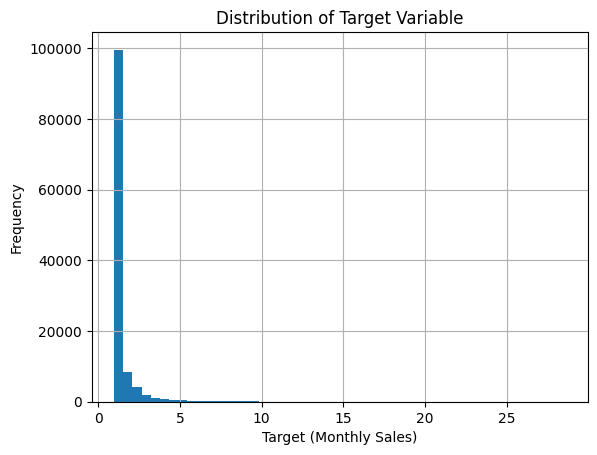

In [ ]:
# Summary of the dataset
print(data.info())
print(data.describe())

# Check for missing values
print(data.isnull().sum())

# Distribution of target
import matplotlib.pyplot as plt
data['target'].hist(bins=50)
plt.title('Distribution of Target Variable')
plt.xlabel('Target (Monthly Sales)')
plt.ylabel('Frequency')
plt.show()


In [ ]:
train_df = data.copy()

In [ ]:
train_df.head()

,brand,che_pc_usd,che_perc_gdp,cluster_nl,corporation,country,launch_date,date,drug_id,ind_launch_date,indication,insurance_perc_che,population,prev_perc,price_month,price_unit,public_perc_che,therapeutic_area,target
0,BRAND_354E,1.209114,1.665879,BRAND_354E_COUNTRY_88A3,CORP_D524,COUNTRY_88A3,2014-06-01,2014-06-01,DRUG_ID_8795,-1,['IND_C3B6'],1.893333,1.008039,0.028367,1.006444,1.013784,1.835821,THER_AREA_980E,1.000784
1,BRAND_626D,-1.000000,-1.000000,BRAND_626D_COUNTRY_8B47,CORP_01C7,COUNTRY_8B47,2014-06-01,2014-06-01,DRUG_ID_E66E,2014-09-01 00:00:00,"['IND_1590', 'IND_ECAC']",-1.000000,1.023562,0.000047,-1.000000,1.626677,-1.000000,THER_AREA_96D7,1.000000
2,BRAND_45D9,1.209114,1.665879,BRAND_45D9_COUNTRY_88A3,CORP_39F7,COUNTRY_88A3,2014-06-01,2014-06-01,DRUG_ID_F272,-1,['IND_B2EF'],1.893333,1.008039,0.001502,-1.000000,3.144874,1.835821,THER_AREA_96D7,1.002258
3,BRAND_D724,1.851280,2.051770,BRAND_D724_COUNTRY_445D,CORP_711A,COUNTRY_445D,2014-06-01,2014-06-01,DRUG_ID_1D4E,-1,['IND_BAFB'],1.000000,1.253186,0.001304,-1.000000,1.213446,1.805970,THER_AREA_6CEE,1.068761
4,BRAND_4887,1.791199,2.059130,BRAND_4887_COUNTRY_D8B0,CORP_443D,COUNTRY_D8B0,2014-06-01,2014-06-01,DRUG_ID_AA88,-1,['IND_3F31'],2.013333,1.639352,0.054467,1.018589,1.008708,1.880597,THER_AREA_6CEE,1.036312


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

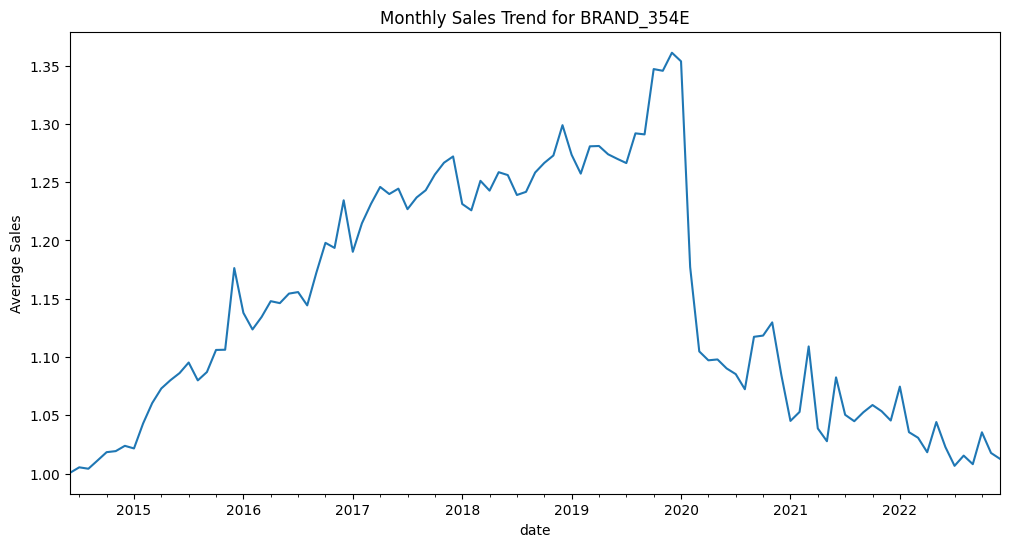

In [ ]:
# Convert 'date' to datetime
train_df['date'] = pd.to_datetime(train_df['date'])

# Plot sales over time for a specific brand
brand_sales = train_df[train_df['brand'] == 'BRAND_354E']
brand_sales.groupby('date')['target'].mean().plot(figsize=(12, 6))
plt.title('Monthly Sales Trend for BRAND_354E')
plt.ylabel('Average Sales')
plt.show()


In [ ]:
############################# Data engeneering #####################################

In [ ]:
import numpy as np
train_df['date'] = pd.to_datetime(train_df['date'])
train_df['price_unit'] = train_df['price_unit'].clip(lower=train_df['price_unit'].quantile(0.01),
                                                     upper=train_df['price_unit'].quantile(0.99))
train_df['log_price_unit'] = np.log1p(train_df['price_unit'])
train_df['days_since_launch'] = (train_df['date'] - train_df['launch_date']).dt.days
train_df['launch_month'] = train_df['launch_date'].dt.month
train_df['launch_quarter'] = train_df['launch_date'].dt.quarter
train_df['price_pop_interaction'] = train_df['price_unit'] * train_df['population']
train_df['price_insurance_interaction'] = train_df['price_unit'] * train_df['insurance_perc_che']
train_df['mean_sales_by_country'] = train_df.groupby('country')['target'].transform('mean')
train_df['mean_sales_by_month'] = train_df.groupby('launch_month')['target'].mean()
train_df['mean_sales_by_brand'] = train_df.groupby('brand')['target'].transform('mean')
train_df['mean_sales_by_drug'] = train_df.groupby('drug_id')['target'].transform('mean')
train_df['mean_sales_by_indication'] = train_df.groupby('indication')['target'].transform('mean')
# Frequency encoding for 'country'
country_counts = train_df['country'].value_counts()
train_df['country_frequency'] = train_df['country'].map(country_counts)

train_df['log_population'] = np.log1p(train_df['population'])

train_df['mean_sales_by_month_brand'] = train_df.groupby(['launch_month', 'brand'])['target'].transform('mean')
train_df['mean_sales_by_cluster'] = train_df.groupby('cluster_nl')['target'].transform('mean')
train_df['total_prevalence'] = train_df['prev_perc'] * train_df['population']
# Compute mean sales by month and brand
train_df['mean_sales_by_month_brand'] = train_df.groupby(['launch_month', 'brand'])['target'].transform('mean')
train_df['mean_sales_by_cluster'] = train_df.groupby('cluster_nl')['target'].transform('mean')
train_df['total_prevalence'] = train_df['prev_perc'] * train_df['population']
train_df['log_population'] = np.log1p(train_df['population'])

In [ ]:
import numpy as np
train_df['log_population'] = np.log1p(train_df['population'])


In [ ]:
# Compute mean sales by month and brand
train_df['mean_sales_by_month_brand'] = train_df.groupby(['launch_month', 'brand'])['target'].transform('mean')
train_df['mean_sales_by_cluster'] = train_df.groupby('cluster_nl')['target'].transform('mean')

In [ ]:
train_df['total_prevalence'] = train_df['prev_perc'] * train_df['population']


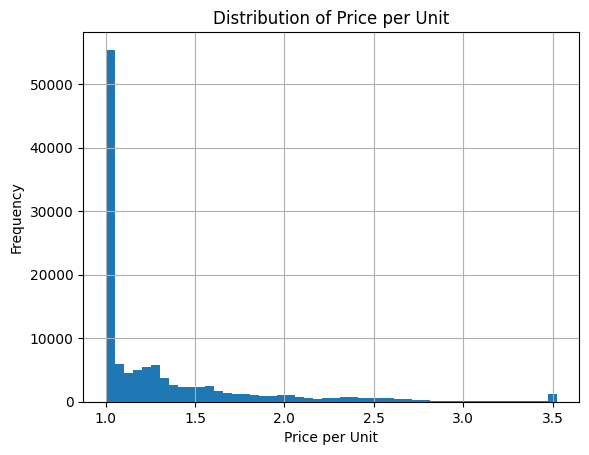

In [ ]:
# Distribution of a key feature
train_df['price_unit'].hist(bins=50)
plt.title('Distribution of Price per Unit')
plt.xlabel('Price per Unit')
plt.ylabel('Frequency')
plt.show()
# Cap extreme outliers
train_df['price_unit'] = train_df['price_unit'].clip(lower=train_df['price_unit'].quantile(0.01),
                                                     upper=train_df['price_unit'].quantile(0.99))
# Log transformation for skewed features
import numpy as np
train_df['log_price_unit'] = np.log1p(train_df['price_unit'])


In [ ]:
train_df['days_since_launch'] = (train_df['date'] - train_df['launch_date']).dt.days
train_df['launch_month'] = train_df['launch_date'].dt.month
train_df['launch_quarter'] = train_df['launch_date'].dt.quarter

train_df['month'] = train_df['date'].dt.month
train_df['quarter'] = train_df['date'].dt.quarter


In [ ]:
train_df['price_pop_interaction'] = train_df['price_unit'] * train_df['population']
train_df['price_insurance_interaction'] = train_df['price_unit'] * train_df['insurance_perc_che']


In [ ]:
# Mean sales per country
train_df['mean_sales_by_country'] = train_df.groupby('country')['target'].transform('mean')
train_df['mean_sales_by_month'] = train_df.groupby('month')['target'].mean()
# Rank sales within therapeutic area
train_df['sales_rank_by_ther_area'] = train_df.groupby('therapeutic_area')['target'].rank()


In [ ]:
train_df['mean_sales_by_brand'] = train_df.groupby('brand')['target'].transform('mean')
train_df['mean_sales_by_drug'] = train_df.groupby('drug_id')['target'].transform('mean')
train_df['mean_sales_by_indication'] = train_df.groupby('indication')['target'].transform('mean')



In [ ]:
# Frequency encoding for 'country'
country_counts = train_df['country'].value_counts()
train_df['country_frequency'] = train_df['country'].map(country_counts)


In [ ]:
train_df['target_mean_by_brand'] = train_df.groupby('brand')['target'].transform('mean')


In [ ]:
import numpy as np
train_df['log_population'] = np.log1p(train_df['population'])


In [ ]:
# Compute mean sales by month and brand
train_df['mean_sales_by_month_brand'] = train_df.groupby(['month', 'brand'])['target'].transform('mean')
train_df['mean_sales_by_month_cluster'] = train_df.groupby(['month', 'cluster_nl'])['target'].transform('mean')
train_df['mean_sales_by_indication_country'] = train_df.groupby(['country', 'indication'])['target'].transform('mean')

train_df['mean_insurance_by_cluster'] = train_df.groupby('cluster_nl')['insurance_perc_che'].transform('mean')
train_df['mean_sales_by_cluster'] = train_df.groupby('cluster_nl')['target'].transform('mean')

In [ ]:
train_df['total_prevalence'] = train_df['prev_perc'] * train_df['population']


In [ ]:
# Creating various ranking features

# 1. Sales Rank by Other Categories
train_df['sales_rank_by_brand'] = train_df.groupby('brand')['target'].rank(ascending=False)
train_df['sales_rank_by_country'] = train_df.groupby('country')['target'].rank(ascending=False)
train_df['sales_rank_by_indication'] = train_df.groupby('indication')['target'].rank(ascending=False)
train_df['sales_rank_by_cluster'] = train_df.groupby('cluster_nl')['target'].rank(ascending=False)

# 2. Cumulative Sales Rank
train_df['cumulative_sales_rank_by_ther_area'] = train_df.groupby('therapeutic_area')['target'].cumsum().rank(ascending=False)
train_df['cumulative_sales_rank_by_brand'] = train_df.groupby('brand')['target'].cumsum().rank(ascending=False)

# 3. Time-Based Sales Rankings
train_df['sales_rank_by_year'] = train_df.groupby(train_df['launch_date'].dt.year)['target'].rank(ascending=False)
train_df['sales_rank_by_month'] = train_df.groupby(train_df['launch_date'].dt.month)['target'].rank(ascending=False)

# 4. Market Share Rankings
train_df['market_share'] = train_df['target'] / train_df.groupby('country')['target'].transform('sum')
train_df['market_share_rank_by_country'] = train_df.groupby('country')['market_share'].rank(ascending=False)
train_df['market_share_rank_by_ther_area'] = train_df.groupby('therapeutic_area')['market_share'].rank(ascending=False)

# 5. Normalized Rankings
train_df['normalized_sales_rank_by_ther_area'] = train_df.groupby('therapeutic_area')['target'].rank(ascending=False, pct=True)
train_df['normalized_sales_rank_by_country'] = train_df.groupby('country')['target'].rank(ascending=False, pct=True)

# 6. Competitive Rankings
train_df['sales_diff_from_avg'] = train_df['target'] - train_df.groupby('therapeutic_area')['target'].transform('mean')
train_df['sales_diff_rank_by_ther_area'] = train_df.groupby('therapeutic_area')['sales_diff_from_avg'].rank(ascending=False)

# If time-series data is available:
if 'sales_growth_rate' not in train_df.columns:  # Prevents errors if already present
    train_df['sales_growth_rate'] = train_df.groupby('drug_id')['target'].pct_change()
    train_df['sales_growth_rank'] = train_df.groupby('therapeutic_area')['sales_growth_rate'].rank(ascending=False)

# 7. Density-Based Rankings
train_df['sales_density_by_population'] = train_df['target'] / train_df['population']
train_df['sales_density_rank_by_country'] = train_df.groupby('country')['sales_density_by_population'].rank(ascending=False)

# 8. Combination Rankings
train_df['composite_rank'] = train_df['sales_rank_by_brand'] + train_df['sales_rank_by_country']

# Replace NaN values resulting from computations (e.g., for growth rate)
train_df.fillna(0, inplace=True)

# Preview the new features
print(train_df.head())


        brand  che_pc_usd  che_perc_gdp               cluster_nl corporation  \
0  BRAND_354E    1.209114      1.665879  BRAND_354E_COUNTRY_88A3   CORP_D524   
1  BRAND_626D   -1.000000     -1.000000  BRAND_626D_COUNTRY_8B47   CORP_01C7   
2  BRAND_45D9    1.209114      1.665879  BRAND_45D9_COUNTRY_88A3   CORP_39F7   
3  BRAND_D724    1.851280      2.051770  BRAND_D724_COUNTRY_445D   CORP_711A   
4  BRAND_4887    1.791199      2.059130  BRAND_4887_COUNTRY_D8B0   CORP_443D   

        country launch_date       date       drug_id      ind_launch_date  \
0  COUNTRY_88A3  2014-06-01 2014-06-01  DRUG_ID_8795                   -1   
1  COUNTRY_8B47  2014-06-01 2014-06-01  DRUG_ID_E66E  2014-09-01 00:00:00   
2  COUNTRY_88A3  2014-06-01 2014-06-01  DRUG_ID_F272                   -1   
3  COUNTRY_445D  2014-06-01 2014-06-01  DRUG_ID_1D4E                   -1   
4  COUNTRY_D8B0  2014-06-01 2014-06-01  DRUG_ID_AA88                   -1   

   ... market_share_rank_by_ther_area  normalized_sales_

In [ ]:
# Adding the new ranking features to the train_num DataFrame
train_num = train_df[[
    # Original features
    'che_pc_usd', 'che_perc_gdp', 'insurance_perc_che', 'population', 'prev_perc',
    'price_month', 'price_unit', 'public_perc_che',
    'days_since_launch', 'price_pop_interaction', 'price_insurance_interaction',
    'total_prevalence',  'log_price_unit', 'log_population',
    'mean_sales_by_country', 'sales_rank_by_ther_area', 'launch_month', 'launch_quarter',
    'mean_sales_by_brand', 'mean_sales_by_drug', 'mean_sales_by_indication',

    # New ranking features
    'sales_rank_by_brand', 'sales_rank_by_country', 'sales_rank_by_indication', 'sales_rank_by_cluster',
    'cumulative_sales_rank_by_ther_area', 'cumulative_sales_rank_by_brand',
    'sales_rank_by_year', 'sales_rank_by_month',
    'market_share_rank_by_country', 'market_share_rank_by_ther_area',
    'normalized_sales_rank_by_ther_area', 'normalized_sales_rank_by_country',
    'sales_diff_rank_by_ther_area', 'sales_growth_rank',
    'sales_density_rank_by_country', 'composite_rank','mean_sales_by_month',
    'mean_sales_by_month_brand', 'mean_sales_by_cluster','mean_sales_by_month_cluster',
    'mean_insurance_by_cluster','mean_sales_by_indication_country',



    # Target variable
    'target'
]]


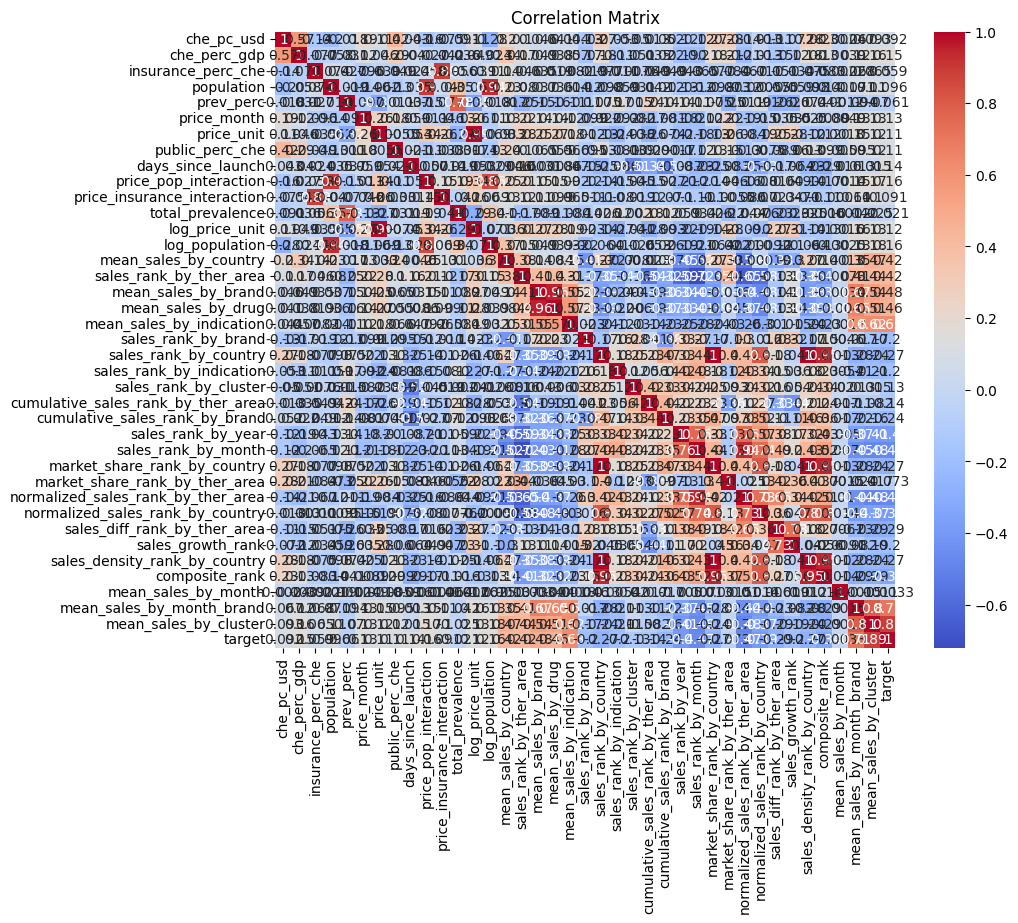

In [ ]:
import seaborn as sns
plt.figure(figsize=(10, 8))
sns.heatmap(train_num.corr(), annot=True, cmap="coolwarm")
plt.title('Correlation Matrix')
plt.show()


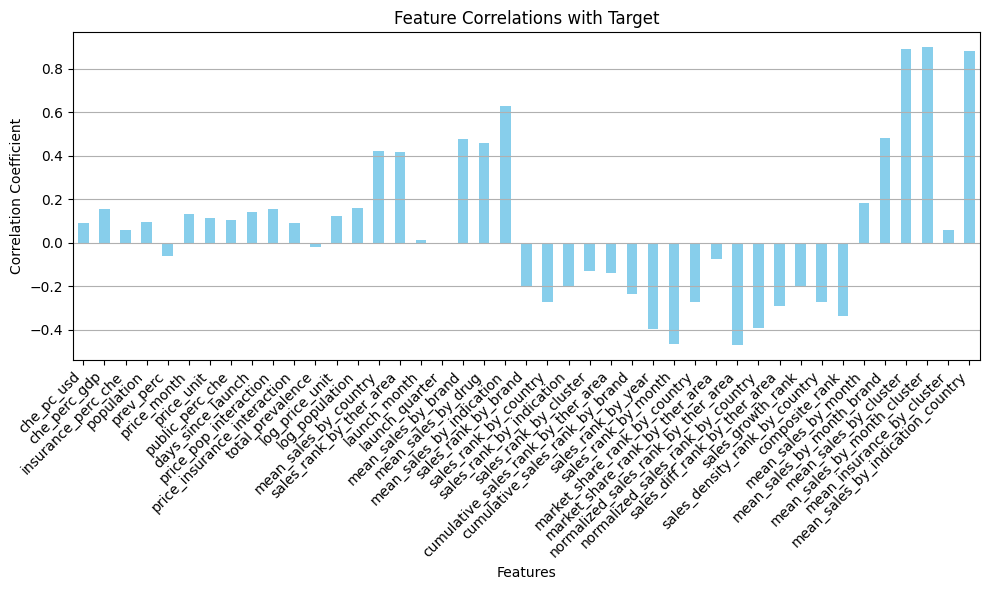

In [ ]:
import matplotlib.pyplot as plt

# Compute correlations with the target
correlations = train_num.corr()['target']

# Sort correlations by absolute value (optional)
# correlations_sorted = correlations.abs().sort_values(ascending=False)

# Drop the target itself from the correlation list
correlations = correlations.drop('target')

# Plot the correlations
plt.figure(figsize=(10, 6))
correlations.plot(kind='bar', color='skyblue')
plt.title('Feature Correlations with Target')
plt.ylabel('Correlation Coefficient')
plt.xlabel('Features')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y')
plt.tight_layout()
plt.show()


In [ ]:
train_df.describe()

,che_pc_usd,che_perc_gdp,launch_date,date,insurance_perc_che,population,prev_perc,price_month,price_unit,public_perc_che,...,brand_encoded,country_encoded,therapeutic_area_encoded,cluster_nl_encoded,corporation_encoded,drug_id_encoded,indication_encoded,mean_sales_by_brand,mean_sales_by_drug,mean_sales_by_indication
count,118917.000000,118917.000000,118917,118917,118917.000000,118917.000000,1.189170e+05,118917.000000,118917.000000,118917.000000,...,118917.000000,118917.000000,118917.000000,118917.000000,118917.000000,118917.000000,118917.000000,118917.000000,118917.000000,118917.000000
mean,1.529389,1.607100,2017-07-11 10:34:49.033527552,2019-09-18 04:08:31.132975104,1.008999,1.483680,5.768206e-02,0.912442,1.321934,1.762006,...,285.922988,23.280994,7.843286,1334.667953,57.140619,120.177939,121.206043,1.420171,1.420171,1.420171
min,-1.000000,-1.000000,2014-06-01 00:00:00,2014-06-01 00:00:00,-1.000000,1.000000,5.954162e-07,-1.000000,1.001034,-1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000013,1.000025,1.000526
25%,1.179931,1.464849,2016-03-01 00:00:00,2018-05-01 00:00:00,1.000000,1.038227,2.463952e-03,1.002854,1.011818,1.671642,...,146.000000,10.000000,6.000000,666.000000,28.000000,54.000000,40.000000,1.091889,1.114831,1.151130
50%,1.472378,1.731474,2017-05-01 00:00:00,2019-11-01 00:00:00,1.346667,1.238870,1.879598e-02,1.015832,1.085415,1.835821,...,270.000000,23.000000,9.000000,1306.000000,60.000000,116.000000,99.000000,1.257403,1.267673,1.268318
75%,1.816479,1.894139,2018-11-01 00:00:00,2021-04-01 00:00:00,1.760000,1.506685,8.556676e-02,1.316595,1.420445,1.925373,...,437.000000,35.000000,9.000000,2012.000000,89.000000,178.000000,190.000000,1.484528,1.455867,1.455625
max,2.656913,2.311103,2022-12-01 00:00:00,2022-12-01 00:00:00,2.040000,12.767484,6.668035e-01,39.343041,3.522036,2.044776,...,590.000000,48.000000,11.000000,2715.000000,135.000000,256.000000,256.000000,5.441324,5.441324,22.472177
std,0.439094,0.537994,NaN,NaN,1.044154,1.336542,9.163269e-02,1.414511,0.494749,0.303401,...,170.766013,14.334673,2.258843,781.413128,40.324420,71.750930,77.904449,0.566210,0.542840,0.745754


In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score


In [ ]:
# Define features (X) and target (y)
X = train_num.drop(columns=['target'])  # Drop the target variable from features
y = train_num['target']  # Target variable

# Train-test split (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Check the shapes of the splits
print("Training data shape:", X_train.shape)
print("Testing data shape:", X_test.shape)


Training data shape: (95133, 40)
Testing data shape: (23784, 40)


In [ ]:
train_df['target'].head()

,target
0,1.000784
1,1.000000
2,1.002258
3,1.068761
4,1.036312


In [ ]:
print("Training data shape:", y_train.shape)
print("Testing data shape:", y_test.shape)


Training data shape: (95133,)
Testing data shape: (23784,)


In [ ]:
# Check for NaN or infinite values in X_train
print("NaN values per column:")
print(X_train.isnull().sum())

print("Infinite values per column:")
print(np.isinf(X_train).sum())


NaN values per column:
che_pc_usd                     0
che_perc_gdp                   0
insurance_perc_che             0
population                     0
prev_perc                      0
price_month                    0
price_unit                     0
public_perc_che                0
days_since_launch              0
total_prevalence               0
price_pop_interaction          0
price_insurance_interaction    0
total_prevalence               0
log_price_unit                 0
log_population                 0
country_frequency              0
mean_sales_by_country          0
sales_rank_by_ther_area        0
mean_sales_by_brand            0
mean_sales_by_drug             0
mean_sales_by_indication       0
dtype: int64
Infinite values per column:
che_pc_usd                     0
che_perc_gdp                   0
insurance_perc_che             0
population                     0
prev_perc                      0
price_month                    0
price_unit                     0
public_perc_

In [ ]:
train_df.describe()

,che_pc_usd,che_perc_gdp,launch_date,date,insurance_perc_che,population,prev_perc,price_month,price_unit,public_perc_che,...,brand_encoded,country_encoded,therapeutic_area_encoded,cluster_nl_encoded,corporation_encoded,drug_id_encoded,indication_encoded,mean_sales_by_brand,mean_sales_by_drug,mean_sales_by_indication
count,118917.000000,118917.000000,118917,118917,118917.000000,118917.000000,1.189170e+05,118917.000000,118917.000000,118917.000000,...,118917.000000,118917.000000,118917.000000,118917.000000,118917.000000,118917.000000,118917.000000,118917.000000,118917.000000,118917.000000
mean,1.529389,1.607100,2017-07-11 10:34:49.033527552,2019-09-18 04:08:31.132975104,1.008999,1.483680,5.768206e-02,0.912442,1.321934,1.762006,...,285.922988,23.280994,7.843286,1334.667953,57.140619,120.177939,121.206043,1.420171,1.420171,1.420171
min,-1.000000,-1.000000,2014-06-01 00:00:00,2014-06-01 00:00:00,-1.000000,1.000000,5.954162e-07,-1.000000,1.001034,-1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000013,1.000025,1.000526
25%,1.179931,1.464849,2016-03-01 00:00:00,2018-05-01 00:00:00,1.000000,1.038227,2.463952e-03,1.002854,1.011818,1.671642,...,146.000000,10.000000,6.000000,666.000000,28.000000,54.000000,40.000000,1.091889,1.114831,1.151130
50%,1.472378,1.731474,2017-05-01 00:00:00,2019-11-01 00:00:00,1.346667,1.238870,1.879598e-02,1.015832,1.085415,1.835821,...,270.000000,23.000000,9.000000,1306.000000,60.000000,116.000000,99.000000,1.257403,1.267673,1.268318
75%,1.816479,1.894139,2018-11-01 00:00:00,2021-04-01 00:00:00,1.760000,1.506685,8.556676e-02,1.316595,1.420445,1.925373,...,437.000000,35.000000,9.000000,2012.000000,89.000000,178.000000,190.000000,1.484528,1.455867,1.455625
max,2.656913,2.311103,2022-12-01 00:00:00,2022-12-01 00:00:00,2.040000,12.767484,6.668035e-01,39.343041,3.522036,2.044776,...,590.000000,48.000000,11.000000,2715.000000,135.000000,256.000000,256.000000,5.441324,5.441324,22.472177
std,0.439094,0.537994,NaN,NaN,1.044154,1.336542,9.163269e-02,1.414511,0.494749,0.303401,...,170.766013,14.334673,2.258843,781.413128,40.324420,71.750930,77.904449,0.566210,0.542840,0.745754


In [ ]:
train_df[train_df['price_unit'] <= 0]

,che_pc_usd,che_perc_gdp,launch_date,date,ind_launch_date,insurance_perc_che,population,prev_perc,price_month,price_unit,...,"indication_['IND_FAD6', 'IND_4106', 'IND_A392', 'IND_F338', 'IND_67CC']","indication_['IND_FAD6', 'IND_4106', 'IND_A392', 'IND_F338', 'IND_7F69', 'IND_67CC']","indication_['IND_FAD6', 'IND_4106', 'IND_A392', 'IND_F338', 'IND_7F69']","indication_['IND_FAD6', 'IND_4106', 'IND_A392', 'IND_F338']","indication_['IND_FAD6', 'IND_4106', 'IND_A392']","indication_['IND_FAD6', 'IND_F338', 'IND_4106', 'IND_A392', 'IND_7F69', 'IND_67CC']","indication_['IND_FAD6', 'IND_F338', 'IND_4106', 'IND_A392', 'IND_7F69']","indication_['IND_FAD6', 'IND_F338', 'IND_4106', 'IND_A392']",indication_['IND_FC21'],"indication_['IND_FE11', 'IND_79CE']"


In [ ]:
problematic_rows = train_df[train_df['price_unit'] <= 0]
print(problematic_rows[['price_unit']])

Empty DataFrame
Columns: [price_unit]
Index: []


In [ ]:
# Initialize the Gradient Boosting Regressor
model = GradientBoostingRegressor(random_state=42, n_estimators=100, learning_rate=0.1, max_depth=3)

# Fit the model
model.fit(X_train, y_train)


GradientBoostingRegressor(random_state=42)

In [ ]:
# Predict on the test set
y_pred = model.predict(X_test)

# Calculate evaluation metrics
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print(f"Mean Absolute Error (MAE): {mae:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")
print(f"R² Score: {r2:.4f}")


Mean Absolute Error (MAE): 0.0738
Root Mean Squared Error (RMSE): 0.1809
R² Score: 0.9757


In [ ]:
# Define features (X) and target (y)
X = train_num.drop(columns=['target'])  # Drop the target variable from features
y = train_num['target']  # Target variable

# Train-test split (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.model_selection import train_test_split

# Initialize the Random Forest Regressor
rf_model = RandomForestRegressor(
    n_estimators=100,  # Number of trees
    max_depth=None,    # Maximum depth of the tree
    random_state=42,   # For reproducibility
    n_jobs=-1          # Use all available cores for training
)

# Train the model
rf_model.fit(X_train, y_train)


RandomForestRegressor(n_jobs=-1, random_state=42)

In [ ]:
# Predict on the test set
y_pred = rf_model.predict(X_test)

# Evaluate performance
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print(f"Mean Absolute Error (MAE): {mae:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")
print(f"R² Score: {r2:.6f}")


Mean Absolute Error (MAE): 0.0455
Root Mean Squared Error (RMSE): 0.1443
R² Score: 0.984546


982264


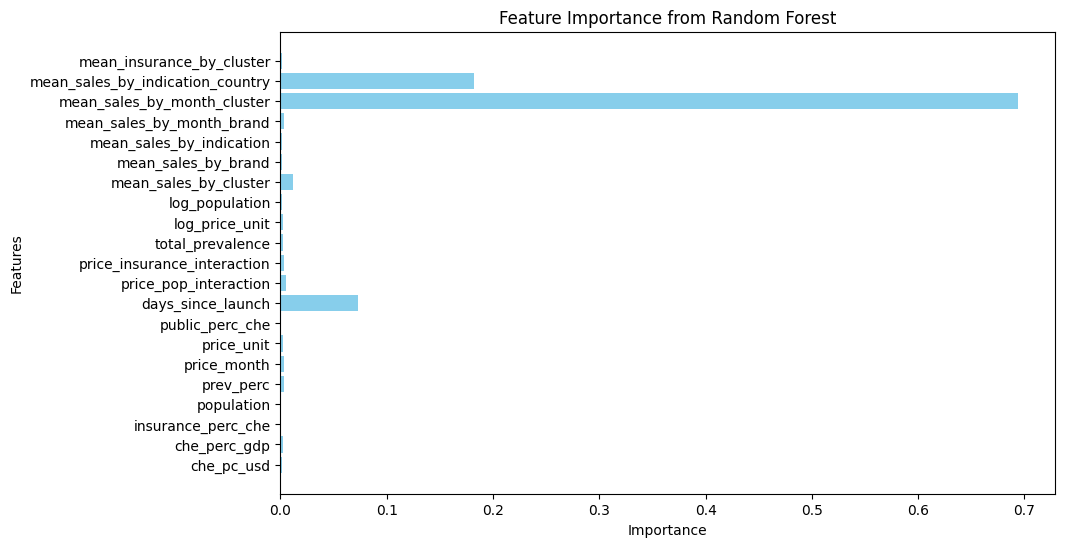

In [ ]:
import matplotlib.pyplot as plt

# Get feature importance
feature_importance = rf_model.feature_importances_

# Plot feature importance
plt.figure(figsize=(10, 6))
plt.barh(X.columns, feature_importance, color='skyblue')
plt.title('Feature Importance from Random Forest')
plt.xlabel('Importance')
plt.ylabel('Features')
plt.show()


In [ ]:
# Adding the new ranking features to the train_num DataFrame
train_num = train_df[[

    'sales_diff_rank_by_ther_area',   'sales_rank_by_ther_area',
    'normalized_sales_rank_by_ther_area', 'normalized_sales_rank_by_country','mean_sales_by_cluster',
    'mean_sales_by_month_brand','mean_sales_by_month_cluster','mean_sales_by_indication',
    'target'
]]


In [ ]:
train_num = train_df[[
    'che_pc_usd', 'che_perc_gdp', 'insurance_perc_che', 'population', 'prev_perc',
    'price_month', 'price_unit', 'public_perc_che',
    'days_since_launch', 'price_pop_interaction', 'price_insurance_interaction',
    'total_prevalence',  'log_price_unit', 'log_population',
    'mean_sales_by_cluster',
    'mean_sales_by_brand',  'mean_sales_by_indication',
    'mean_sales_by_month_brand','mean_sales_by_month_cluster',
    'mean_sales_by_indication_country',
    'mean_insurance_by_cluster',

    'target'
]]

In [ ]:
from sklearn.model_selection import RandomizedSearchCV

# Define hyperparameter grid
param_grid = {
    'n_estimators': [20],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5,10],
    'min_samples_leaf': [1, 5,10],
    'max_features': ['sqrt','log']
}

# Randomized search
random_search = RandomizedSearchCV(
    estimator=RandomForestRegressor(random_state=42),
    param_distributions=param_grid,
    n_iter=50,  # Number of parameter settings sampled
    scoring='neg_mean_squared_error',
    cv=3,
    n_jobs=-1,
    random_state=42
)
random_search.fit(X_train, y_train)

# Best parameters
print("Best Parameters:", random_search.best_params_)
rf_model = random_search.best_estimator_


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_search.py:320: UserWarning: The total space of parameters 12 is smaller than n_iter=50. Running 12 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


Best Parameters: {'n_estimators': 100, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': 'sqrt', 'max_depth': 20}


In [ ]:
# Predict on the test set
y_pred_best = rf_model.predict(X_test)

# Evaluate performance
mae = mean_absolute_error(y_test, y_pred_best)
rmse = np.sqrt(mean_squared_error(y_test, y_pred_best))
r2 = r2_score(y_test, y_pred_best)

print(f"Mean Absolute Error (MAE): {mae:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")
print(f"R² Score: {r2:.4f}")


Mean Absolute Error (MAE): 0.0500
Root Mean Squared Error (RMSE): 0.1613
R² Score: 0.9807


In [ ]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(rf_model, X_train, y_train, cv=5, scoring='neg_mean_squared_error')
print("Cross-Validated RMSE:", np.sqrt(-scores.mean()))


Cross-Validated RMSE: 0.18896852903847983


In [ ]:
################################# Submission #####################################################

In [ ]:
data_path_sub = '/content/drive/My Drive/Hackaton/submission_data.xlsx'

In [ ]:
sub_df = pd.read_excel(data_path_sub)

In [ ]:
submission_data = sub_df.copy()

In [ ]:
submission_data.head()

,brand,che_pc_usd,che_perc_gdp,cluster_nl,corporation,country,launch_date,date,drug_id,ind_launch_date,indication,insurance_perc_che,population,prev_perc,price_month,price_unit,public_perc_che,therapeutic_area,target
0,BRAND_E57A,2.079046,1.467920,BRAND_E57A_COUNTRY_06E4,CORP_01C7,COUNTRY_06E4,2022-02-01,2023-01-01,DRUG_ID_FADD,2022-08-01 00:00:00,['IND_C3B6'],1.000000,1.004739,0.036647,1.007091,1.012037,1.910448,THER_AREA_980E,NaN
1,BRAND_014B,2.079046,1.467920,BRAND_014B_COUNTRY_06E4,CORP_01C7,COUNTRY_06E4,2022-09-01,2023-01-01,DRUG_ID_E07F,-1,['IND_A496'],1.000000,1.004739,0.106925,-1.000000,1.121625,1.910448,THER_AREA_6CEE,NaN
2,BRAND_1E6F,1.018268,1.108030,BRAND_1E6F_COUNTRY_4647,CORP_01C7,COUNTRY_4647,2022-05-01,2023-01-01,DRUG_ID_1A21,2022-06-01 00:00:00,"['IND_120F', 'IND_8E8D']",1.226667,3.243906,0.041152,-1.000000,1.005001,1.567164,THER_AREA_CD59,NaN
3,BRAND_9259,1.190075,1.515375,BRAND_9259_COUNTRY_FA79,CORP_01C7,COUNTRY_FA79,2022-12-01,2023-01-01,DRUG_ID_1315,-1,['IND_BAFB'],1.785253,1.042681,0.002766,-1.000000,1.271214,1.786265,THER_AREA_6CEE,NaN
4,BRAND_106A,1.018876,1.127864,BRAND_106A_COUNTRY_E319,CORP_DF1B,COUNTRY_E319,2022-12-01,2023-01-01,DRUG_ID_2832,2020-03-01 00:00:00,['IND_5586'],1.076762,1.881992,0.000133,-1.000000,2.073953,1.223881,THER_AREA_96D7,NaN


In [ ]:
# Normalize therapeutic_area
train_df['therapeutic_area'] = train_df['therapeutic_area'].str.strip().str.lower()
submission_data['therapeutic_area'] = submission_data['therapeutic_area'].str.strip().str.lower()


In [ ]:
# Find unmatched therapeutic_area values
missing_areas = submission_data[~submission_data['therapeutic_area'].isin(train_df['therapeutic_area'])]
print("Missing therapeutic_area values:", missing_areas['therapeutic_area'].unique())


Missing therapeutic_area values: []


In [ ]:
# Compute mean_sales_by_cluster in train_df
mean_sales_by_cluster = train_df.groupby('cluster_nl')['target'].mean()
mean_sales_by_month_brand = train_df.groupby([train_df['date'].dt.month, 'brand'])['target'].mean()
mean_sales_by_month_cluster = train_df.groupby([train_df['date'].dt.month, 'cluster_nl'])['target'].mean()
mean_sales_by_indication = train_df.groupby('indication')['target'].mean()
# Precompute other features in train_df
# Add these features to submission_data
submission_data['mean_sales_by_cluster'] = submission_data['cluster_nl'].map(mean_sales_by_cluster)
submission_data['mean_sales_by_month_brand'] = submission_data.apply(lambda row: mean_sales_by_month_brand.get((row['launch_date'].month, row['brand']), np.nan), axis=1)
submission_data['mean_sales_by_month_cluster'] = submission_data.apply(lambda row: mean_sales_by_month_cluster.get((row['launch_date'].month, row['cluster_nl']), np.nan), axis=1)
submission_data['mean_sales_by_indication'] = submission_data['indication'].map(mean_sales_by_indication)

# sales_rank_by_month = train_df.groupby(train_df['launch_date'].dt.month)['sales_rank_by_month'].mean()
normalized_sales_rank_by_country = train_df.groupby('country')['normalized_sales_rank_by_country'].mean()

# Map features to submission_data
# submission_data['sales_rank_by_month'] = submission_data['launch_date'].dt.month.map(sales_rank_by_month)
submission_data['normalized_sales_rank_by_country'] = submission_data['country'].map(normalized_sales_rank_by_country)


# Handle missing values
# Compute ranks
sales_rank_by_ther_area = train_df.groupby('therapeutic_area')['target'].rank(ascending=False)
normalized_sales_rank_by_ther_area = train_df.groupby('therapeutic_area')['target'].rank(ascending=False, pct=True)
sales_diff_rank_by_ther_area = train_df.groupby('therapeutic_area')['sales_diff_rank_by_ther_area'].mean()

# Aggregate ranks for mapping (ensure unique index)
sales_rank_by_ther_area = train_df.groupby('therapeutic_area')['sales_rank_by_ther_area'].mean()
normalized_sales_rank_by_ther_area = train_df.groupby('therapeutic_area')['normalized_sales_rank_by_ther_area'].mean()
submission_data['sales_diff_rank_by_ther_area'] = submission_data['therapeutic_area'].map(sales_diff_rank_by_ther_area)
submission_data['sales_rank_by_ther_area'] = submission_data['therapeutic_area'].map(sales_rank_by_ther_area)

# Map to submission_data
submission_data['normalized_sales_rank_by_ther_area'] = submission_data['therapeutic_area'].map(normalized_sales_rank_by_ther_area)




In [ ]:
submission_data.head()

,brand,che_pc_usd,che_perc_gdp,cluster_nl,corporation,country,launch_date,date,drug_id,ind_launch_date,...,public_perc_che,therapeutic_area,target,mean_sales_by_cluster,mean_sales_by_month_brand,mean_sales_by_month_cluster,normalized_sales_rank_by_country,sales_diff_rank_by_ther_area,normalized_sales_rank_by_ther_area,sales_rank_by_ther_area
0,BRAND_E57A,2.079046,1.467920,BRAND_E57A_COUNTRY_06E4,CORP_01C7,COUNTRY_06E4,2022-02-01,2023-01-01,DRUG_ID_FADD,2022-08-01 00:00:00,...,1.910448,ther_area_980e,NaN,1.004400,1.011774,1.004400,0.500153,10149.5,0.500025,10149.5
1,BRAND_014B,2.079046,1.467920,BRAND_014B_COUNTRY_06E4,CORP_01C7,COUNTRY_06E4,2022-09-01,2023-01-01,DRUG_ID_E07F,-1,...,1.910448,ther_area_6cee,NaN,1.018621,1.103154,1.018621,0.500153,5936.0,0.500042,5936.0
2,BRAND_1E6F,1.018268,1.108030,BRAND_1E6F_COUNTRY_4647,CORP_01C7,COUNTRY_4647,2022-05-01,2023-01-01,DRUG_ID_1A21,2022-06-01 00:00:00,...,1.567164,ther_area_cd59,NaN,1.008374,1.008374,1.008374,0.504237,2289.5,0.500109,2289.5
3,BRAND_9259,1.190075,1.515375,BRAND_9259_COUNTRY_FA79,CORP_01C7,COUNTRY_FA79,2022-12-01,2023-01-01,DRUG_ID_1315,-1,...,1.786265,ther_area_6cee,NaN,1.002087,1.101116,1.002087,0.500157,5936.0,0.500042,5936.0
4,BRAND_106A,1.018876,1.127864,BRAND_106A_COUNTRY_E319,CORP_DF1B,COUNTRY_E319,2022-12-01,2023-01-01,DRUG_ID_2832,2020-03-01 00:00:00,...,1.223881,ther_area_96d7,NaN,1.001131,1.001131,1.001131,0.500333,22929.5,0.500011,22929.5


In [ ]:
from operator import sub
import numpy as np

# Apply the same transformations as in the training data
submission_data['log_price_unit'] = np.log1p(submission_data['price_unit'].replace({0: 1e-6}).clip(lower=1e-6))
submission_data['log_population'] = np.log1p(submission_data['population'])
submission_data['days_since_launch'] = (submission_data['date'] - submission_data['launch_date']).dt.days
submission_data['price_pop_interaction'] = submission_data['price_unit'] * submission_data['population']
submission_data['price_insurance_interaction'] = submission_data['price_unit'] * submission_data['insurance_perc_che']
submission_data['total_prevalence'] = submission_data['prev_perc'] * submission_data['population']



# Add placeholder for aggregate features (if not available)
# E.g., mean_sales_by_brand, mean_sales_by_drug, mean_sales_by_indication
# If calculated on training data, map them to submission data
# Map mean sales from training data to submission data
mean_sales_by_country = train_df.groupby('country')['target'].mean()
mean_sales_by_brand = train_df.groupby('brand')['target'].mean()
mean_sales_by_drug = train_df.groupby('drug_id')['target'].mean()
mean_sales_by_indication = train_df.groupby('indication')['target'].mean()
mean_sales_by_month = train_df.groupby(train_df['date'].dt.month)['target'].mean()
mean_sales_by_cluster = train_df.groupby('cluster_nl')['target'].mean()
mean_sales_by_month_brand = train_df.groupby([train_df['date'].dt.month, 'brand'])['target'].mean()
mean_sales_by_month_cluster = train_df.groupby([train_df['date'].dt.month, 'cluster_nl'])['target'].mean()
mean_sales_by_indication_country = train_df.groupby(['indication', 'country'])['target'].mean()
mean_insurance_by_cluster = train_df.groupby('cluster_nl')['insurance_perc_che'].mean()

country_frequency = train_df['country'].value_counts()

submission_data['mean_sales_by_country'] = submission_data['country'].map(mean_sales_by_country)
submission_data['mean_sales_by_brand'] = submission_data['brand'].map(mean_sales_by_brand)
submission_data['mean_sales_by_drug'] = submission_data['drug_id'].map(mean_sales_by_drug)
submission_data['mean_sales_by_indication'] = submission_data['indication'].map(mean_sales_by_indication)
submission_data['country_frequency'] = submission_data['country'].map(country_frequency)
submission_data['mean_sales_by_month'] = submission_data['date'].dt.month.map(mean_sales_by_month)
submission_data['mean_sales_by_cluster'] = submission_data['cluster_nl'].map(mean_sales_by_cluster)
submission_data['mean_sales_by_month_brand'] = submission_data.apply(lambda row: mean_sales_by_month_brand.get((row['date'].month, row['brand']), np.nan), axis=1)
submission_data['mean_sales_by_month_cluster'] = submission_data.apply(lambda row: mean_sales_by_month_cluster.get((row['date'].month, row['cluster_nl']), np.nan), axis=1)
submission_data['mean_sales_by_indication_country'] = submission_data.apply(lambda row: mean_sales_by_indication_country.get((row['indication'], row['country']), np.nan), axis=1)
submission_data['mean_insurance_by_cluster'] = submission_data['cluster_nl'].map(mean_insurance_by_cluster)





In [ ]:
submission_data.head()

,brand,che_pc_usd,che_perc_gdp,cluster_nl,corporation,country,launch_date,date,drug_id,ind_launch_date,...,price_insurance_interaction,total_prevalence,mean_sales_by_country,mean_sales_by_brand,mean_sales_by_drug,mean_sales_by_indication,country_frequency,mean_sales_by_month,mean_sales_by_cluster,mean_sales_by_month_brand
0,BRAND_E57A,2.079046,1.467920,BRAND_E57A_COUNTRY_06E4,CORP_01C7,COUNTRY_06E4,2022-02-01,2023-01-01,DRUG_ID_FADD,2022-08-01 00:00:00,...,1.012037,0.036821,1.078038,1.048916,1.047722,1.203103,3260,1.397738,1.004400,1.011774
1,BRAND_014B,2.079046,1.467920,BRAND_014B_COUNTRY_06E4,CORP_01C7,COUNTRY_06E4,2022-09-01,2023-01-01,DRUG_ID_E07F,-1,...,1.121625,0.107432,1.078038,1.145483,1.134495,1.146335,3260,1.354554,1.018621,1.103154
2,BRAND_1E6F,1.018268,1.108030,BRAND_1E6F_COUNTRY_4647,CORP_01C7,COUNTRY_4647,2022-05-01,2023-01-01,DRUG_ID_1A21,2022-06-01 00:00:00,...,1.232802,0.133493,1.292911,1.007688,1.007688,1.083899,118,1.517752,1.008374,1.008374
3,BRAND_9259,1.190075,1.515375,BRAND_9259_COUNTRY_FA79,CORP_01C7,COUNTRY_FA79,2022-12-01,2023-01-01,DRUG_ID_1315,-1,...,2.269440,0.002884,1.089722,1.190500,1.188673,1.460323,3183,1.547763,1.002087,1.101116
4,BRAND_106A,1.018876,1.127864,BRAND_106A_COUNTRY_E319,CORP_DF1B,COUNTRY_E319,2022-12-01,2023-01-01,DRUG_ID_2832,2020-03-01 00:00:00,...,2.233153,0.000251,1.036856,1.221266,1.429653,1.369670,1503,1.547763,1.001131,1.001131


In [ ]:
# Extract features used in training
X_submission = submission_data[[
    'che_pc_usd', 'che_perc_gdp', 'insurance_perc_che', 'population', 'prev_perc',
    'price_month', 'price_unit', 'public_perc_che',
    'days_since_launch', 'price_pop_interaction', 'price_insurance_interaction',
    'total_prevalence',  'log_price_unit', 'log_population',
    'mean_sales_by_cluster',
    'mean_sales_by_brand',  'mean_sales_by_indication',
    'mean_sales_by_month_brand','mean_sales_by_month_cluster',
    'mean_sales_by_indication_country',
    'mean_insurance_by_cluster'
]]

# Confirm alignment with training data
assert list(X_submission.columns) == list(train_num.drop(columns='target').columns), "Feature mismatch!"


In [ ]:
# Predict using the trained model
submission_data['prediction'] = rf_model.predict(X_submission)

# Create the submission file
submission_file = submission_data[['date', 'cluster_nl', 'prediction']]
# submission_file.to_csv('submission.csv', index=False)
# print("Submission file saved as 'submission.csv'")


In [ ]:
submission_data.head()

,brand,che_pc_usd,che_perc_gdp,cluster_nl,corporation,country,launch_date,date,drug_id,ind_launch_date,...,mean_sales_by_drug,mean_sales_by_indication,country_frequency,mean_sales_by_month,mean_sales_by_cluster,mean_sales_by_month_brand,mean_sales_by_month_cluster,mean_sales_by_indication_country,mean_insurance_by_cluster,prediction
0,BRAND_E57A,2.079046,1.467920,BRAND_E57A_COUNTRY_06E4,CORP_01C7,COUNTRY_06E4,2022-02-01,2023-01-01,DRUG_ID_FADD,2022-08-01 00:00:00,...,1.047722,1.203103,3260,1.397738,1.004400,1.011774,1.004400,1.032473,1.000000,1.005671
1,BRAND_014B,2.079046,1.467920,BRAND_014B_COUNTRY_06E4,CORP_01C7,COUNTRY_06E4,2022-09-01,2023-01-01,DRUG_ID_E07F,-1,...,1.134495,1.146335,3260,1.354554,1.018621,1.103154,1.018621,1.018621,1.000000,1.009963
2,BRAND_1E6F,1.018268,1.108030,BRAND_1E6F_COUNTRY_4647,CORP_01C7,COUNTRY_4647,2022-05-01,2023-01-01,DRUG_ID_1A21,2022-06-01 00:00:00,...,1.007688,1.083899,118,1.517752,1.008374,1.008374,1.008374,1.008374,1.226667,1.010310
3,BRAND_9259,1.190075,1.515375,BRAND_9259_COUNTRY_FA79,CORP_01C7,COUNTRY_FA79,2022-12-01,2023-01-01,DRUG_ID_1315,-1,...,1.188673,1.460323,3183,1.547763,1.002087,1.101116,1.002087,1.126468,1.785806,1.002469
4,BRAND_106A,1.018876,1.127864,BRAND_106A_COUNTRY_E319,CORP_DF1B,COUNTRY_E319,2022-12-01,2023-01-01,DRUG_ID_2832,2020-03-01 00:00:00,...,1.429653,1.369670,1503,1.547763,1.001131,1.001131,1.001131,1.005644,1.074459,1.001138


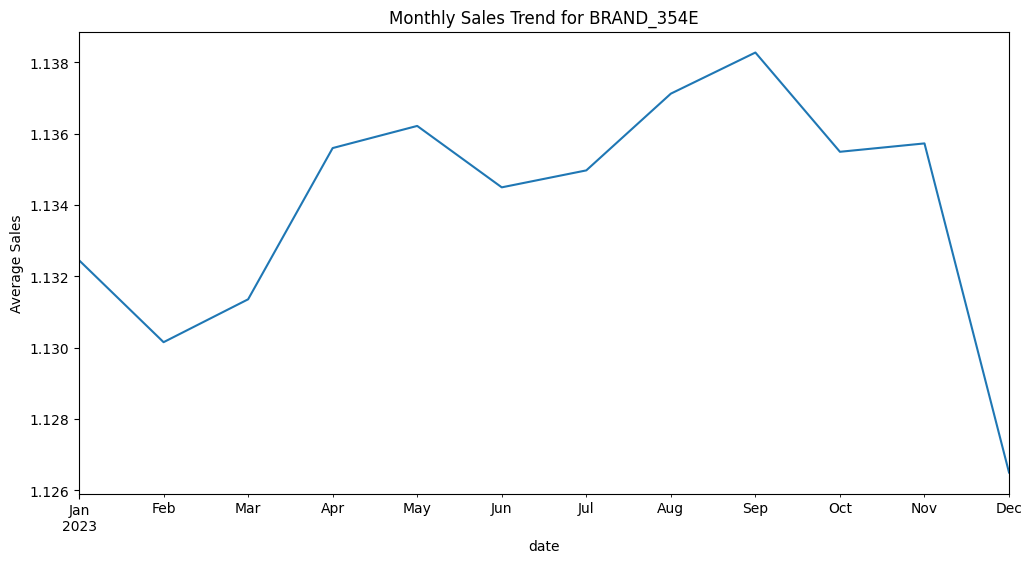

In [ ]:
submission_data['date'] = pd.to_datetime(submission_data['date'])

# Plot sales over time for a specific brand
brand_sales = submission_data[submission_data['brand'] == 'BRAND_014B']
brand_sales.groupby('date')['prediction'].mean().plot(figsize=(12, 6))
plt.title('Monthly Sales Trend for BRAND_354E')
plt.ylabel('Average Sales')
plt.show()


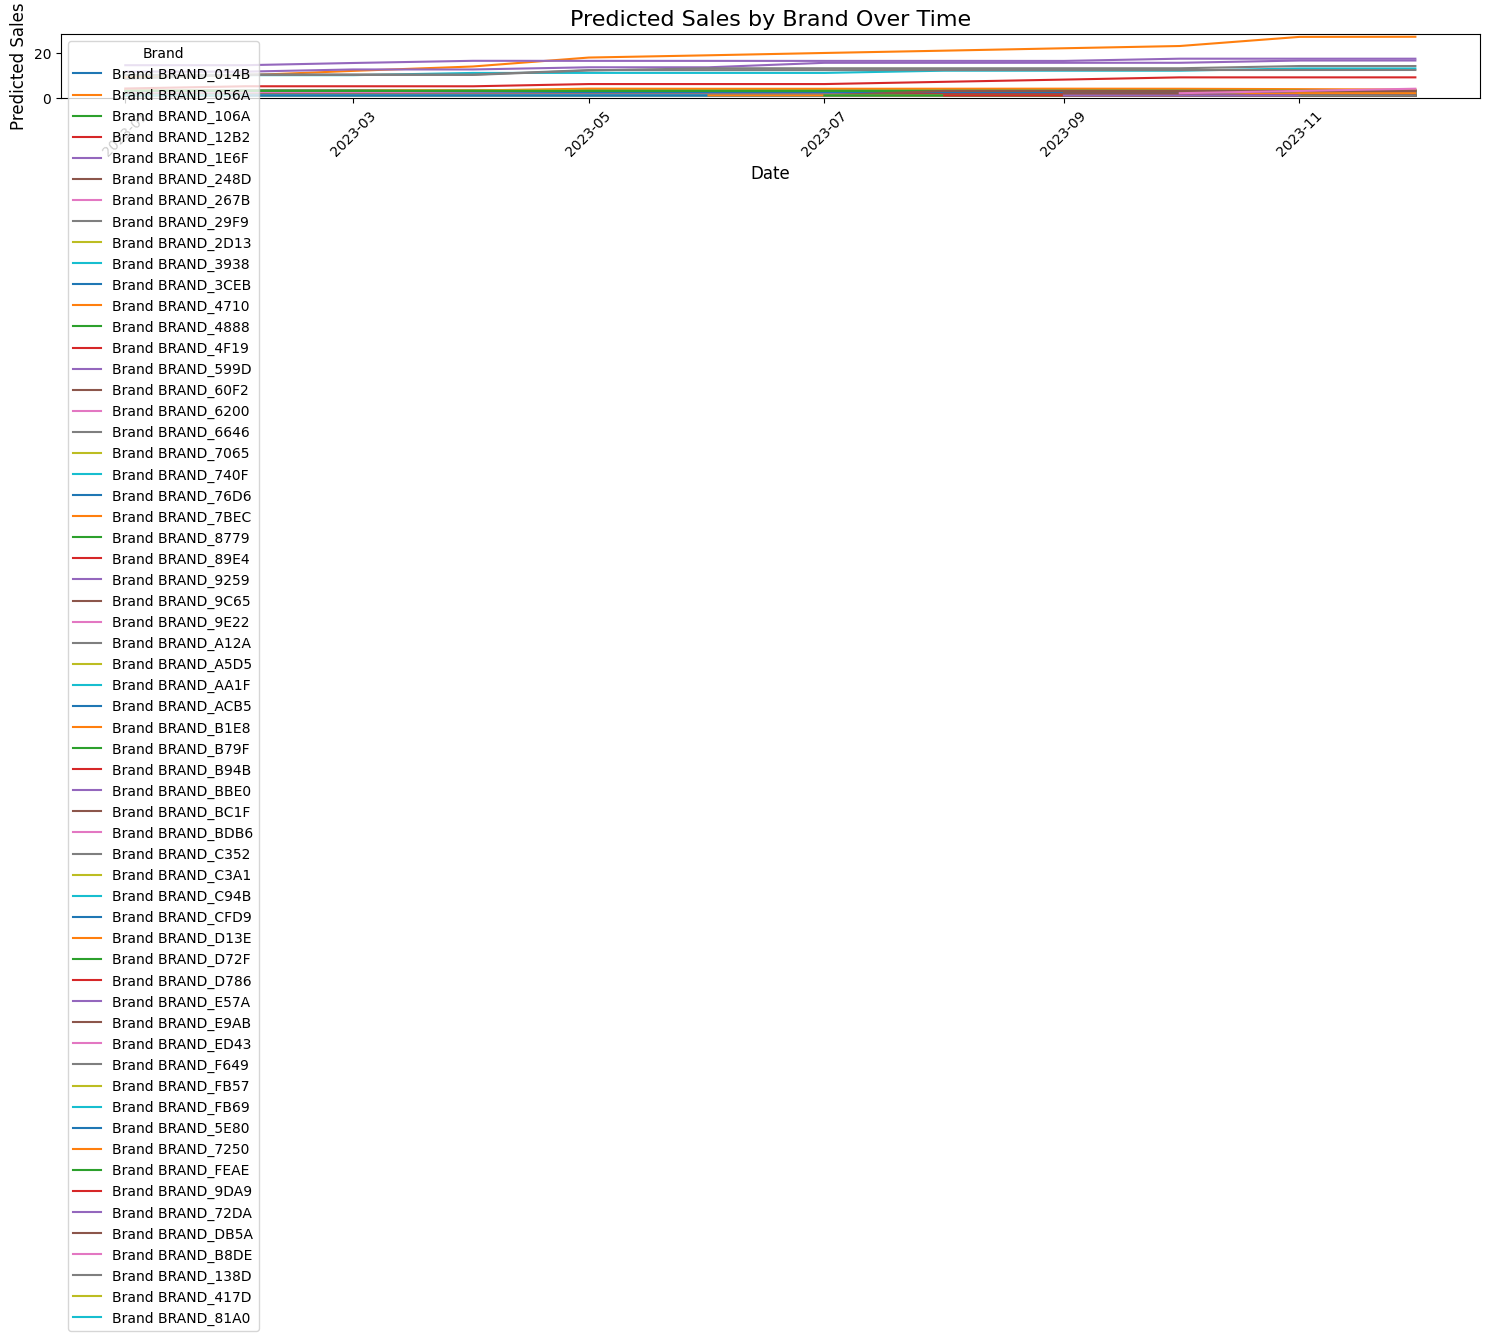

In [ ]:
import matplotlib.pyplot as plt

# Group predictions by brand and date
predicted_sales_by_date_brand = submission_data.groupby(['date', 'brand'])['prediction'].sum().reset_index()

# Plot sales by date for each brand
plt.figure(figsize=(15, 8))
for brand in predicted_sales_by_date_brand['brand'].unique():
    brand_data = predicted_sales_by_date_brand[predicted_sales_by_date_brand['brand'] == brand]
    plt.plot(brand_data['date'], brand_data['prediction'], label=f'Brand {brand}')

# Customize the plot
plt.title('Predicted Sales by Brand Over Time', fontsize=16)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Predicted Sales', fontsize=12)
plt.legend(title='Brand', loc='upper left', fontsize=10)
plt.xticks(rotation=45, fontsize=10)
plt.tight_layout()
plt.show()


In [ ]:
# Sort submission_data by date
submission_file.sort_values(by=['cluster_nl','date'], inplace=True)


<ipython-input-120-0a36b06f9525>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  submission_file.sort_values(by=['cluster_nl','date'], inplace=True)


In [ ]:
submission_file.head()

,date,cluster_nl,prediction
18,2023-01-01,BRAND_014B_COUNTRY_0309,1.065808
201,2023-02-01,BRAND_014B_COUNTRY_0309,1.065808
260,2023-03-01,BRAND_014B_COUNTRY_0309,1.065808
456,2023-04-01,BRAND_014B_COUNTRY_0309,1.065808
560,2023-05-01,BRAND_014B_COUNTRY_0309,1.065808


In [ ]:
print(len(submission_file))
submission_file.to_csv('submission_rf_curiosity.csv', index=False)
print("Submission file saved as 'submission.csv'")

1769
Submission file saved as 'submission.csv'


In [ ]:
print(sum(submission_file['prediction'].isna()))

0


In [ ]:
from google.colab import files
files.download('submission_rf_curiosity.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>